In [1]:
import os
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Model

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)


In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


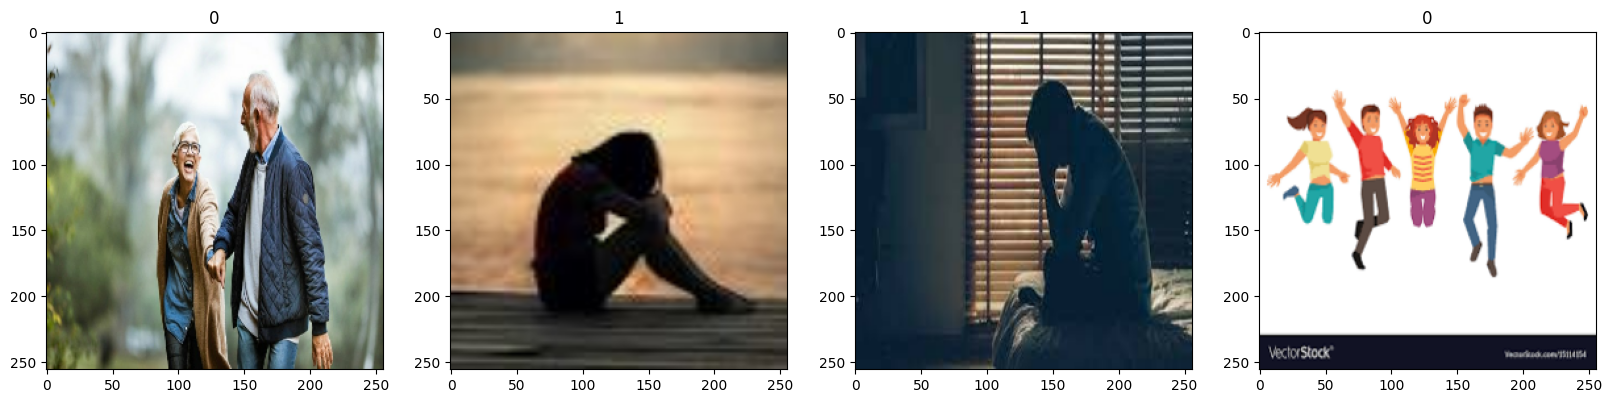

In [8]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.5064951 , 0.5692402 , 0.52610296],
          [0.5213235 , 0.58406866, 0.54093134],
          [0.5355392 , 0.5982843 , 0.54901963],
          ...,
          [0.9655637 , 0.96164215, 0.953799  ],
          [0.96862745, 0.9647059 , 0.95686275],
          [0.96862745, 0.9647059 , 0.95686275]],
 
         [[0.5064951 , 0.5692402 , 0.52610296],
          [0.5213235 , 0.58406866, 0.54093134],
          [0.5355392 , 0.5982843 , 0.54901963],
          ...,
          [0.9648684 , 0.96094686, 0.9531037 ],
          [0.96544886, 0.9615273 , 0.95368415],
          [0.96544886, 0.9615273 , 0.95368415]],
 
         [[0.5064951 , 0.5692402 , 0.52610296],
          [0.5213235 , 0.58406866, 0.54093134],
          [0.5355392 , 0.5982843 , 0.54901963],
          ...,
          [0.9647059 , 0.9607843 , 0.9529412 ],
          [0.9647059 , 0.9607843 , 0.9529412 ],
          [0.9647059 , 0.9607843 , 0.9529412 ]],
 
         ...,
 
         [[0.8213654 , 0.6761984 , 0.6055413 ],
          [0.82354

In [10]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [11]:
train_size

7

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [13]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [15]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [17]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [18]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 15s 645ms/step - loss: 0.9802 - accuracy: 0.5893 - val_loss: 0.6394 - val_accuracy: 0.5781
Epoch 2/20
7/7 [==============================] - 4s 385ms/step - loss: 0.6607 - accuracy: 0.6518 - val_loss: 0.6013 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 3s 391ms/step - loss: 0.5875 - accuracy: 0.7232 - val_loss: 0.5572 - val_accuracy: 0.7812
Epoch 4/20
7/7 [==============================] - 3s 395ms/step - loss: 0.5660 - accuracy: 0.7098 - val_loss: 0.4274 - val_accuracy: 0.8906
Epoch 5/20
7/7 [==============================] - 3s 371ms/step - loss: 0.4656 - accuracy: 0.8527 - val_loss: 0.3520 - val_accuracy: 0.7969
Epoch 6/20
7/7 [==============================] - 4s 418ms/step - loss: 0.4174 - accuracy: 0.8259 - val_loss: 0.3597 - val_accuracy: 0.9219
Epoch 7/20
7/7 [==============================] - 4s 385ms/step - loss: 0.3175 - accuracy: 0.9196 - val_loss: 0.2548 - val_accuracy: 0.8906
Epoch 8/20
7/7 [===

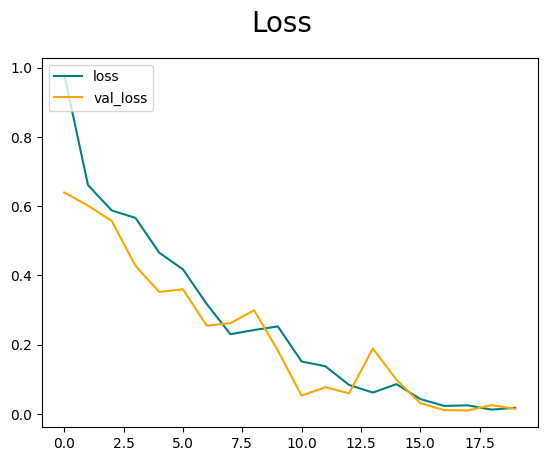

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

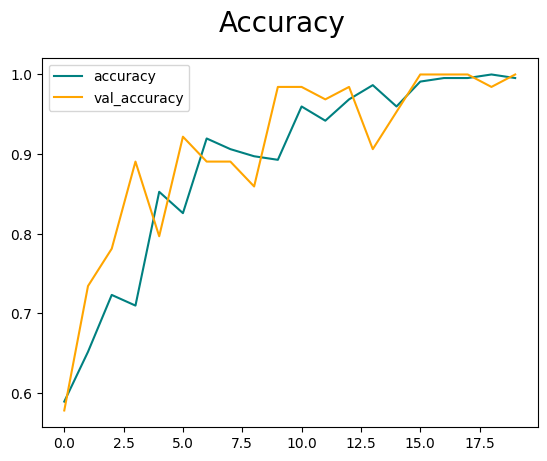

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [21]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [22]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [23]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [24]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [25]:
import cv2

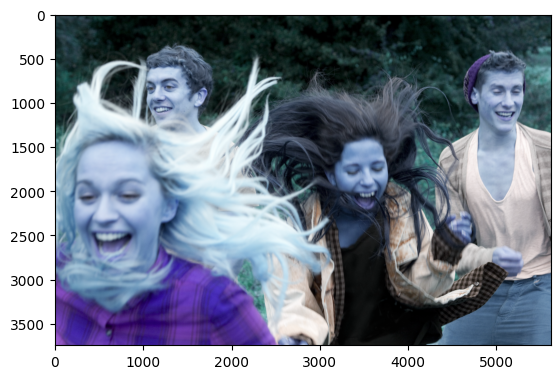

In [26]:
img = cv2.imread('happy_test.jpg')
plt.imshow(img)
plt.show()

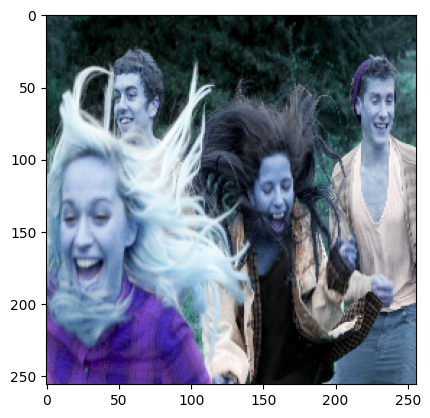

In [27]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [28]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [29]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [30]:
from tensorflow.keras.models import load_model

In [31]:
yhat

array([[0.33635274]], dtype=float32)

In [32]:
model.save(os.path.join('models','imageclassifier.h5'))

In [33]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.09608598]], dtype=float32)